In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_excel('imoveis.xlsx')

In [4]:
df.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 996.0 bytes


<Axes: xlabel='area', ylabel='Count'>

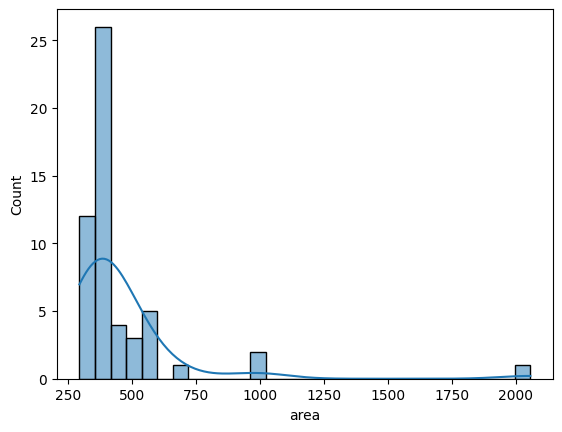

In [8]:
sns.histplot(df, x='area', kde=True)

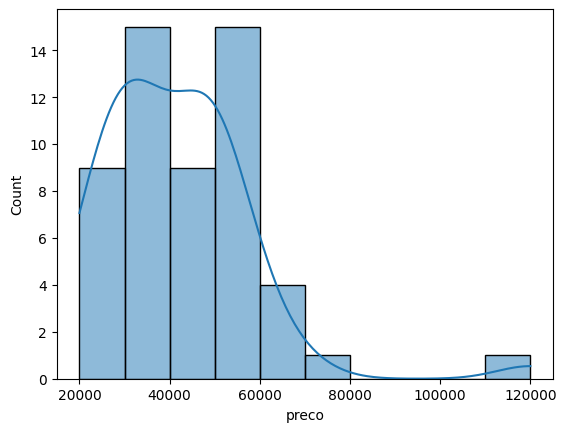

In [12]:
sns.histplot(df, x='preco', kde=True);

In [13]:
df.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


<Axes: xlabel='area', ylabel='preco'>

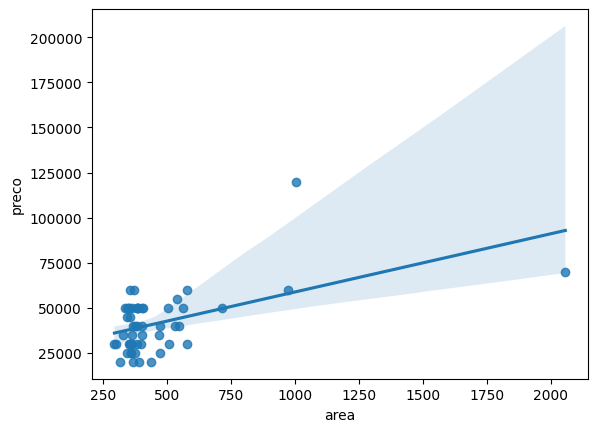

In [14]:
sns.regplot(data=df, x='area', y='preco')

In [15]:
df.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)


In [19]:
df_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [20]:
df_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


<Axes: xlabel='area', ylabel='preco'>

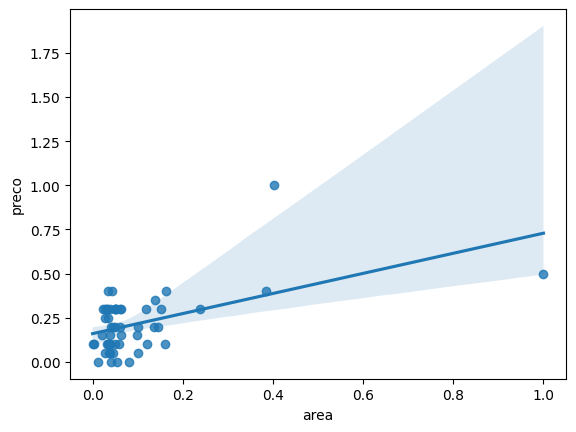

In [22]:
sns.regplot(data=df_norm, x='area', y='preco')

In [26]:
import statsmodels.formula.api as smf
function = 'preco~area'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           7.76e-05
Time:                        10:21:44   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

In [29]:
x = df_norm[['area']]
y = df_norm[['preco']]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

lr = LinearRegression()

lr.fit(x_train, y_train)


LinearRegression()

In [32]:
r_sq = lr.score(x_train,y_train)
print(r_sq)

0.2754399686961231


In [35]:
y_pred_train = lr.predict(x_train)
print('MAE', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE 0.1068423059800295
MSE 0.01998711973859072
RMSE 0.14137581030215432


In [36]:
lr.fit(x_test, y_test)

LinearRegression()

In [38]:
y_pred_test = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.10852020952335328
MSE: 0.01746864564020875
RMSE: 0.13216900408268478
